<a href="https://colab.research.google.com/github/KrituneX/Machine-Learning/blob/main/03.%20week%203/Task/ML_Week_3_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# 1. Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize
from IPython.display import display, Math, Markdown
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [22]:
# 2. Load dataset (gunakan file dari GitHub)
url = "https://raw.githubusercontent.com/KrituneX/Machine-Learning/main/03.%20week%203/dataset/income.csv"
df = pd.read_csv(url)

In [23]:
# 3. Preprocessing: Encode label kategori jadi numerik
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [24]:
# 4. Pisahkan fitur dan target
X = df.drop("income", axis=1)
y = df["income"]

In [14]:
# 5. Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# 6. Model K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [26]:
# 7. Model Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

In [27]:
# 8. Evaluasi Model - Classification Report
print("=== K-Nearest Neighbors Report ===")
print(classification_report(y_test, knn_pred))

print("=== Decision Tree Report ===")
print(classification_report(y_test, tree_pred))

=== K-Nearest Neighbors Report ===
              precision    recall  f1-score   support

           0       0.53      0.76      0.63      7380
           1       0.26      0.17      0.21      3729
           2       0.43      0.25      0.32      2382
           3       0.18      0.04      0.07      1162

    accuracy                           0.47     14653
   macro avg       0.35      0.31      0.31     14653
weighted avg       0.42      0.47      0.43     14653

=== Decision Tree Report ===
              precision    recall  f1-score   support

           0       0.60      0.59      0.60      7380
           1       0.33      0.34      0.34      3729
           2       0.42      0.41      0.41      2382
           3       0.19      0.20      0.20      1162

    accuracy                           0.47     14653
   macro avg       0.39      0.39      0.39     14653
weighted avg       0.47      0.47      0.47     14653



In [28]:
# 9. ROC Curve & AUC Score
# Binarisasi target agar bisa dipakai di multi-class ROC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])

# Probabilitas prediksi dari model
knn_probs = knn.predict_proba(X_test)
tree_probs = tree.predict_proba(X_test)

# Hitung AUC Score multi-class
knn_auc = roc_auc_score(y_test_binarized, knn_probs, multi_class='ovr')
tree_auc = roc_auc_score(y_test_binarized, tree_probs, multi_class='ovr')

print(f"AUC Score k-NN (multi-class): {knn_auc:.2f}")
print(f"AUC Score Decision Tree (multi-class): {tree_auc:.2f}")

AUC Score k-NN (multi-class): 0.59
AUC Score Decision Tree (multi-class): 0.59


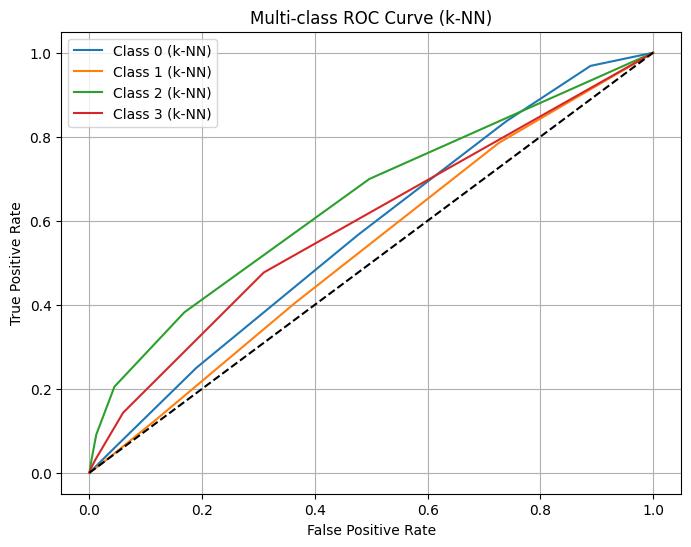

In [29]:
# 10. Plot ROC Curve
fpr = dict()
tpr = dict()
plt.figure(figsize=(8,6))
for i in range(4):  # karena ada 4 kelas
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], knn_probs[:, i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (k-NN)')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("Multi-class ROC Curve (k-NN)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


# **📚 Penjelasan Lengkap Persamaan Matematika**
Model yang digunakan:
✅ K-Nearest Neighbors (k-NN)
✅ Decision Tree

# **1. 🎯 Akurasi (Accuracy)**

📌 Rumus:

In [30]:
display(Math(r"\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}"))

<IPython.core.display.Math object>

**📖 Penjelasan:**

Akurasi mengukur seberapa banyak prediksi model yang benar, dibandingkan dengan total seluruh data. Cocok digunakan ketika distribusi data seimbang.

TP (True Positive): Data positif yang diprediksi positif

TN (True Negative): Data negatif yang diprediksi negatif

FP (False Positive): Data negatif tapi diprediksi positif

FN (False Negative): Data positif tapi diprediksi negatif

# **2. 🧮 Presisi (Precision)**

📌 Rumus:

In [31]:
display(Math(r"\text{Precision} = \frac{TP}{TP + FP}"))

<IPython.core.display.Math object>

**📖 Penjelasan:**

Presisi menjawab pertanyaan:
"Dari semua prediksi positif yang diberikan oleh model, berapa banyak yang benar-benar positif?"

Presisi tinggi artinya model jarang salah memberikan label positif, sangat berguna saat False Positive sangat merugikan (contoh: diagnosa penyakit langka).

# **3. 📡 Recall (Sensitivity / TPR)**

📌 Rumus:

In [32]:
display(Math(r"\text{Recall} = \frac{TP}{TP + FN}"))

<IPython.core.display.Math object>

**📖 Penjelasan:**

Recall menjawab pertanyaan:
"Dari semua data yang sebenarnya positif, berapa banyak yang berhasil dikenali oleh model?"

Recall tinggi artinya model jarang melewatkan data positif. Penting saat False Negative sangat berbahaya (contoh: deteksi kanker).

# **4. ⚖️ F1 Score**

📌 Rumus:

In [33]:
display(Math(r"\text{F1 Score} = 2 \times \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}"))

<IPython.core.display.Math object>

**📖 Penjelasan:**

F1 Score adalah harmonik rata-rata antara presisi dan recall. Cocok digunakan saat kamu butuh keseimbangan antara False Positives dan False Negatives.

Nilai F1 tinggi hanya bisa dicapai jika kedua nilai presisi dan recall juga tinggi.

# **5. 📊 ROC Curve (Receiver Operating Characteristic)**

📌 Sumbu:

In [34]:
display(Markdown("### ❗ False Positive Rate (FPR)"))
display(Math(r"\text{FPR} = \frac{FP}{FP + TN}"))

### ❗ False Positive Rate (FPR)

<IPython.core.display.Math object>

In [35]:
display(Markdown("### ✅ True Positive Rate (TPR)"))
display(Math(r"\text{TPR} = \frac{TP}{TP + FN}"))

### ✅ True Positive Rate (TPR)

<IPython.core.display.Math object>

**📖 Penjelasan:**

ROC Curve menggambarkan kemampuan model dalam membedakan kelas di berbagai threshold.
Kurva yang mendekati titik kiri atas berarti performa model sangat baik.

# **6. 🟦 AUC Score (Area Under Curve)**

📌 Rumus Konseptual:

In [36]:
display(Math(r"\text{AUC} = \int_0^1 TPR(FPR)\,dFPR"))

<IPython.core.display.Math object>

**📖 Penjelasan:**

AUC adalah luas di bawah kurva ROC. Semakin besar AUC (maksimum 1.0), semakin baik model membedakan antara kelas.

Nilai AUC:

0.5 = model tebak-tebakan

0.7 = cukup baik

0.9 = sangat baik

Untuk multi-class, digunakan pendekatan:

OvR (One-vs-Rest)

OVO (One-vs-One)